# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Mhd Firdaus Alfatah Nst]
- **Email:** [firdaysalfatah@gmail.com]
- **ID Dicoding:** [firdays_alfatah_20cq]

## Menentukan Pertanyaan Bisnis

- Siapakah yang lebih sering menyewa sepeda, user casual atau user registered?
- Bagaimana perbandingan jumlah peminjam casual dan peminjam registered tiap bulannya?
- Apakah perubahan musim mempengaruhi jumlah orang yang menyewa sepeda?
- Pada waktu apa user lebih sering menyewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## Data Wrangling

### Gathering Data

##### Membaca file csv

In [2]:
day_df = pd.read_csv('data/day.csv')
hour_df = pd.read_csv('data/hour.csv')


#### Melihat sample setiap data frame

In [3]:
print("Day data Frame")
day_df.head()

Day data Frame


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
print("Hour data Frame")
hour_df.head()

Hour data Frame


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
print("Panjang dari data frame day adalah: ", day_df.shape)
print("Panjang dari data frame hour adalah: ", hour_df.shape)

Panjang dari data frame day adalah:  (731, 16)
Panjang dari data frame hour adalah:  (17379, 17)


**Insight:**
- Data frame day memiliki 731 baris dan 16 kolom
- Data frame day memiliki 17379 baris dan 17 kolom


### Assessing Data

#### Informasi dari stiap data frame

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Mencari missing value di setiap dataframe

In [9]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Mencari Outlier di setiap data frame

In [11]:
day_df.max()

instant              731
dteday        2012-12-31
season                 4
yr                     1
mnth                  12
holiday                1
weekday                6
workingday             1
weathersit             3
temp            0.861667
atemp           0.840896
hum               0.9725
windspeed       0.507463
casual              3410
registered          6946
cnt                 8714
dtype: object

In [12]:
hour_df.max()

instant            17379
dteday        2012-12-31
season                 4
yr                     1
mnth                  12
hr                    23
holiday                1
weekday                6
workingday             1
weathersit             4
temp                 1.0
atemp                1.0
hum                  1.0
windspeed         0.8507
casual               367
registered           886
cnt                  977
dtype: object

#### Mencari nilai duplikat di setiap data frame

In [13]:
print("Jumlah duplikasi day data frame : ",day_df.duplicated().sum())

Jumlah duplikasi day data frame :  0


In [14]:
print("Jumlah duplikasi hour data frame : ",hour_df.duplicated().sum())

Jumlah duplikasi hour data frame :  0


**Insight:**
- Di dalam kedua data frame  tidak ada missing value
- Di dalam kedua data frame  tidak ada duplikasi data
- Di dalam kedua data frame  tidak ada inacurate value
- Di dalam kedua data frame  tidak ada outlier
- Di dalam kedua data frame  tidak ada kesalahan tipe data

### Cleaning Data

**Insight**
Dikarenakan dalam tahap assesing data tidak ada  
- Missing value  
- Duplikasi data  
- Inacurate value  
- Outlier
- Kesalahan tipe data

Maka cleaning data dilewatkan

## Exploratory Data Analysis (EDA)

#### Descriptive Statistic dalam setiap data frame

In [15]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [16]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


#### Grouping berdasarkan season

In [17]:
day_df.groupby(by=['yr', 'season']).agg({
    'instant':'nunique',
    'casual': 'sum',
    'registered': 'sum',
    'cnt': ['min', 'max', 'sum']
})

instant  casual registered   cnt              
          nunique     sum        sum   min   max     sum
yr season                                               
0  1           90   21425     128575   431  3239  150000
   2           92   77564     269752   795  5805  347316
   3           94   95450     324200  1115  6043  419650
   4           89   52813     273324   627  5511  326137
1  1           91   39197     282151   441  7836  321348
   2           92  125958     445315  1027  8362  571273
   3           94  130641     510838  4073  8714  641479
   4           89   76969     438507    22  8555  515476

#### Grouping berdasarkan cuaca

In [18]:
# Dalam bentuk cuaca setiap hari
day_df.groupby(by=['weathersit']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
})

,casual,registered,cnt
weathersit,,,
1,446346,1811606,2257952
2,169776,827082,996858
3,3895,33974,37869


In [19]:
# Dalam bentuk cuaca setiap jam
hour_df.groupby(by=['weathersit']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
})

,casual,registered,cnt
weathersit,,,
1,462745,1875428,2338173
2,134481,661471,795952
3,22783,135548,158331
4,8,215,223


#### Grouping berdasarkan working day

In [20]:
day_df.groupby(by=['yr', 'workingday']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
})

casual  registered      cnt
yr workingday                             
0  0           128898      257941   386839
   1           118354      737910   856264
1  0           187834      425596   613430
   1           184931     1251215  1436146

#### Untuk menjawab pertanyaan keempat, jam akan dikategorikan berdasarkan pembagian waktu

In [21]:
def time_category(time):
    if 0 <= time <= 11:
        return 'Morning'
    elif 12 <= time <= 16:
        return 'Day'
    elif 17 <= time <= 19:
        return 'Afternoon'
    elif 20 <= time <= 23:
        return 'Night'
hour_df['time_category'] = hour_df.hr.apply(time_category)

hour_df.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_category
15284,15285,2012-10-04,4,1,10,1,0,4,1,2,0.62,0.5455,0.94,0.0000,2,23,25,Morning
5547,5548,2011-08-24,3,0,8,1,0,3,1,1,0.60,0.6061,0.60,0.1045,7,17,24,Morning
11158,11159,2012-04-15,2,1,4,3,0,0,0,2,0.52,0.5000,0.59,0.1343,18,27,45,Morning
12284,12285,2012-06-01,2,1,6,1,0,5,1,1,0.64,0.6212,0.53,0.2239,0,34,34,Morning
15718,15719,2012-10-22,4,1,10,3,0,1,1,1,0.40,0.4091,0.62,0.0000,1,5,6,Morning
17189,17190,2012-12-24,1,1,12,0,0,1,1,1,0.22,0.2727,0.69,0.0000,0,12,12,Morning
302,303,2011-01-14,1,0,1,1,0,5,1,1,0.10,0.1212,0.54,0.1642,0,5,5,Morning
17276,17277,2012-12-27,1,1,12,17,0,4,1,2,0.26,0.2424,0.52,0.2836,30,227,257,Afternoon
12653,12654,2012-06-16,2,1,6,10,0,6,0,1,0.64,0.6212,0.47,0.1940,139,296,435,Morning
863,864,2011-02-08,1,0,2,10,0,2,1,1,0.22,0.1818,0.47,0.5522,4,44,48,Morning


**Insight:**
- Ketika cuaca sangat buruk jumlah total penyewaan menurun.  

- Pola penyewaan sepeda bagi user casual tidak memiliki perbedaan yang signifikan ketika di hari kerja ataupun hari libur.  

- Sedangkan pola penyewaan sepeda bagi user registered lebih tinggi ketika di hari kerja.  

## Visualization & Explanatory Analysis

### Siapakah yang lebih sering menyewa sepeda, user casual atau user registered?
### Bagaimana perbandingan jumlah peminjam casual dan peminjam registered tiap bulannya?  

In [22]:
daydf_bymonth = day_df.groupby(by=['yr', 'mnth']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()
daydf_bymonth.sample(5)

,yr,mnth,casual,registered,cnt
2,0,3,12826,51219,64045
4,0,5,31050,104771,135821
6,0,7,36452,104889,141341
22,1,11,21009,131655,152664
13,1,2,8721,94416,103137


#### Visualisasi

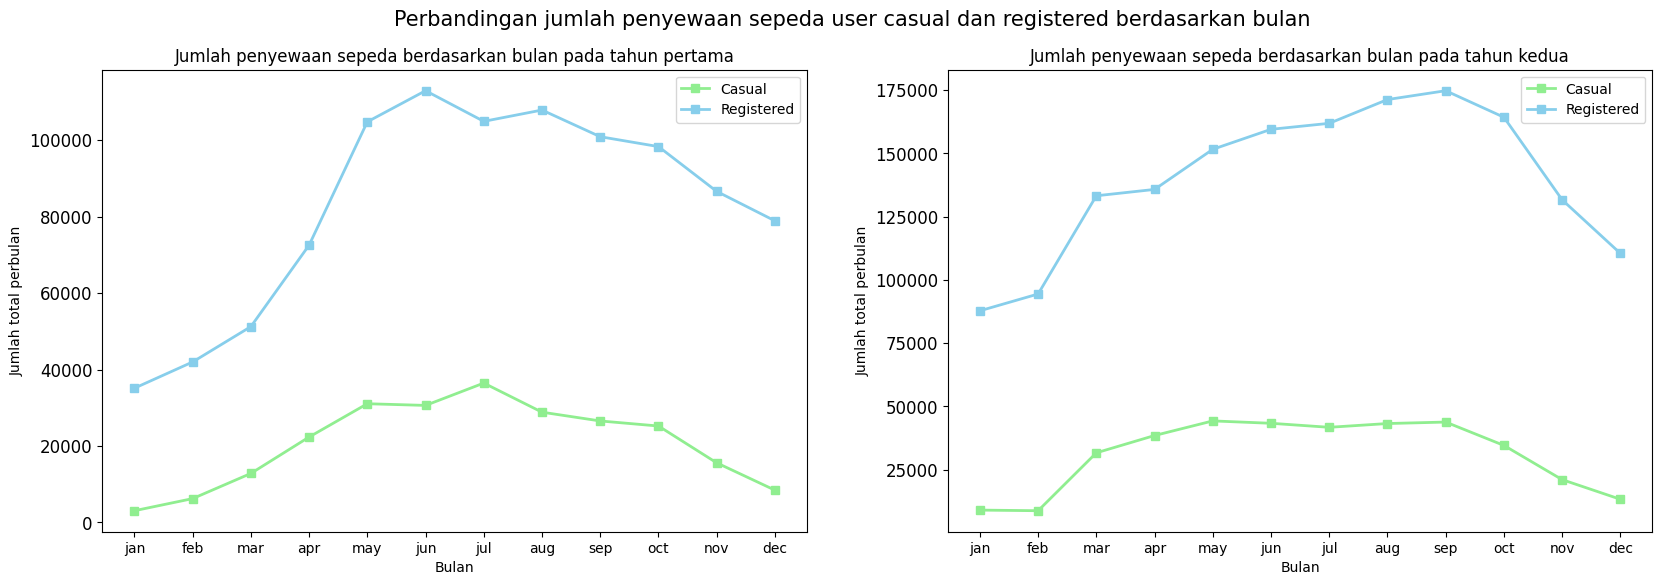

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

month_name = ['jan', 'feb', 'mar', 'apr', 'may' ,'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Pada tahun pertama
ax[0].plot(daydf_bymonth[daydf_bymonth['yr'] == 0]['mnth'], daydf_bymonth[daydf_bymonth['yr'] == 0]['casual'], marker='s', linewidth=2, color='lightgreen', label='Casual')
ax[0].plot(daydf_bymonth[daydf_bymonth['yr'] == 0]['mnth'], daydf_bymonth[daydf_bymonth['yr'] == 0]['registered'], marker='s', linewidth=2, color='skyblue', label='Registered')
ax[0].set_title('Jumlah penyewaan sepeda berdasarkan bulan pada tahun pertama', loc='center')
ax[0].set_xlabel('Bulan')
ax[0].set_ylabel('Jumlah total perbulan')
ax[0].set_xticks(range(1, 13))
ax[0].set_xticklabels(month_name)
ax[0].legend(loc='upper right')
ax[0].tick_params(axis = 'y', labelsize=12)


# Pada tahun kedua
ax[1].plot(daydf_bymonth[daydf_bymonth['yr'] == 1]['mnth'], daydf_bymonth[daydf_bymonth['yr'] == 1]['casual'], marker='s', linewidth=2, color='lightgreen', label='Casual')
ax[1].plot(daydf_bymonth[daydf_bymonth['yr'] == 1]['mnth'], daydf_bymonth[daydf_bymonth['yr'] == 1]['registered'], marker='s', linewidth=2, color='skyblue', label='Registered')
ax[1].set_title('Jumlah penyewaan sepeda berdasarkan bulan pada tahun kedua', loc='center')
ax[1].set_xlabel('Bulan')
ax[1].set_ylabel('Jumlah total perbulan')
ax[1].set_xticks(range(1, 13))
ax[1].set_xticklabels(month_name)
ax[1].legend(loc='upper right')
ax[1].tick_params(axis = 'y', labelsize=12)

plt.suptitle('Perbandingan jumlah penyewaan sepeda user casual dan registered berdasarkan bulan', fontsize=15)
plt.show()

### Apakah perubahan musim mempengaruhi jumlah orang yang menyewa sepeda?

In [24]:
daydf_byseason = day_df.groupby(by=['yr', 'season', 'mnth']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()
daydf_byseason.sample(5)

,yr,season,mnth,casual,registered,cnt
0,0,1,1,3073,35116,38189
27,1,3,9,32291,125416,157707
29,1,4,10,34538,164303,198841
2,0,1,3,8957,32249,41206
3,0,1,12,3153,19237,22390


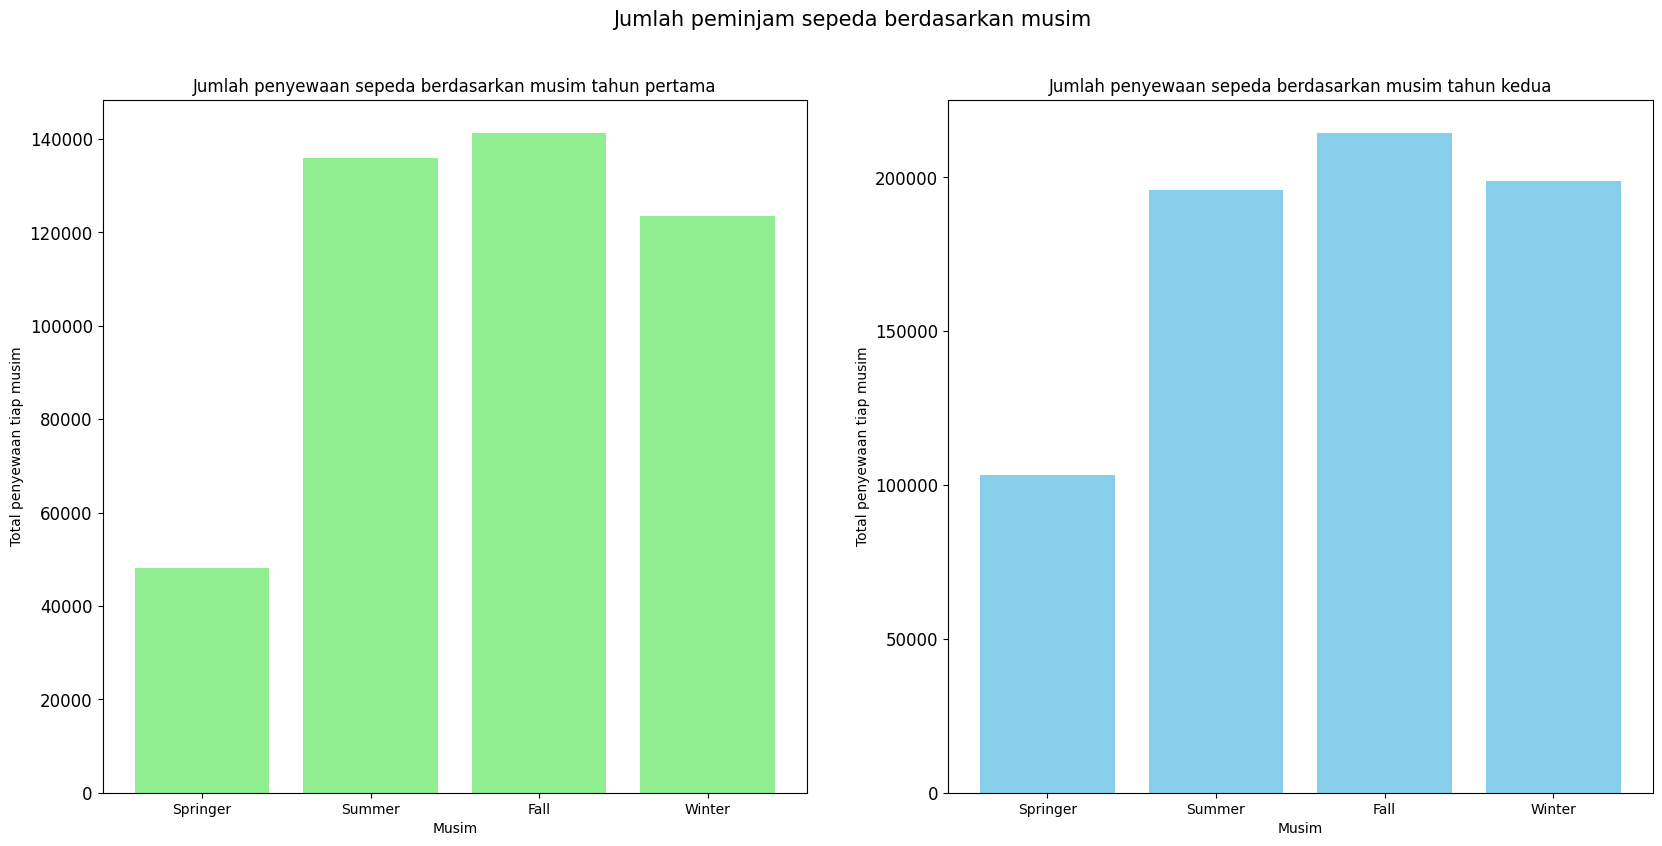

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 9))


season_name = ['Springer', 'Summer', 'Fall', 'Winter']

ax[0].bar(daydf_byseason[daydf_byseason['yr'] == 0]['season'], daydf_byseason[daydf_byseason['yr'] == 0 ]['cnt'], color='lightgreen')
ax[0].set_title('Jumlah penyewaan sepeda berdasarkan musim tahun pertama')
ax[0].set_xlabel('Musim')
ax[0].set_ylabel('Total penyewaan tiap musim')
ax[0].set_xticks(range(1, 5))
ax[0].set_xticklabels(season_name)
ax[0].tick_params(axis='y', labelsize=12)

ax[1].bar(daydf_byseason[daydf_byseason['yr'] == 1]['season'], daydf_byseason[daydf_byseason['yr'] == 1 ]['cnt'], color='skyblue')
ax[1].set_title('Jumlah penyewaan sepeda berdasarkan musim tahun kedua')
ax[1].set_xlabel('Musim')
ax[1].set_ylabel('Total penyewaan tiap musim')
ax[1].set_xticks(range(1, 5))
ax[1].set_xticklabels(season_name)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle('Jumlah peminjam sepeda berdasarkan musim', fontsize=15)
plt.show()

#### Pada waktu apa user lebih sering menyewa sepeda?

In [26]:
hourdf_byhour = hour_df.groupby(by=['yr', 'time_category']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
})
hourdf_byhour

casual  registered     cnt
yr time_category                            
0  Afternoon       54064      276355  330419
   Day            101857      257374  359231
   Morning         59502      319465  378967
   Night           31829      142657  174486
1  Afternoon       80157      462845  543002
   Day            164103      432548  596651
   Morning         86121      548740  634861
   Night           42384      232678  275062

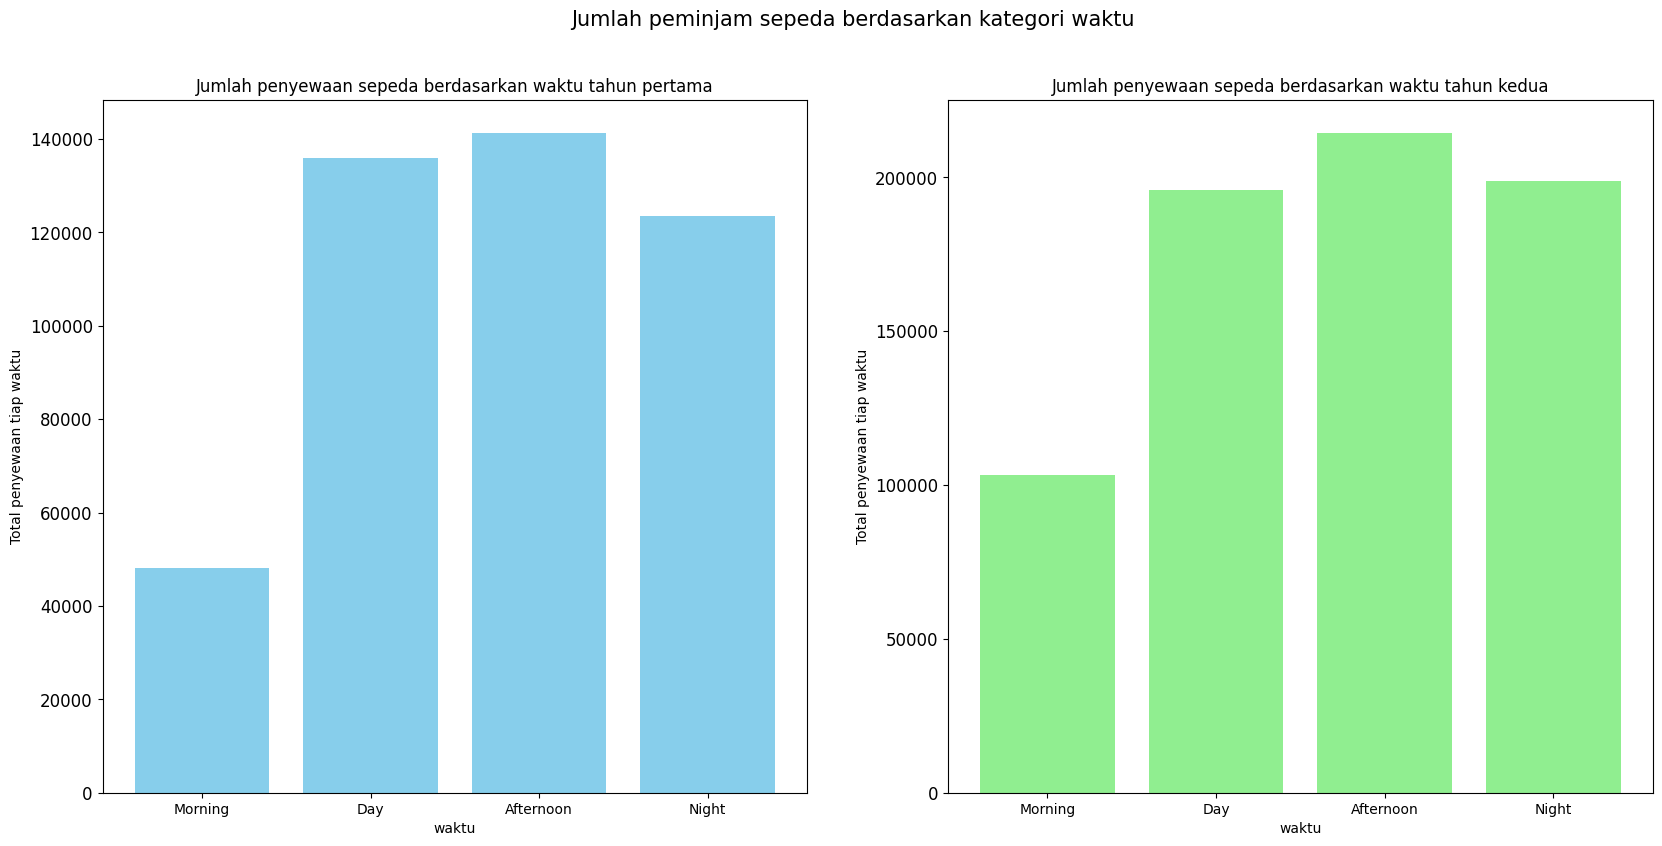

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 9))


category_name = ['Morning', 'Day', 'Afternoon', 'Night']

ax[0].bar(daydf_byseason[daydf_byseason['yr'] == 0]['season'], daydf_byseason[daydf_byseason['yr'] == 0 ]['cnt'], color='skyblue')
ax[0].set_title('Jumlah penyewaan sepeda berdasarkan waktu tahun pertama')
ax[0].set_xlabel('waktu')
ax[0].set_ylabel('Total penyewaan tiap waktu')
ax[0].set_xticks(range(1, 5))
ax[0].set_xticklabels(category_name)
ax[0].tick_params(axis='y', labelsize=12)

ax[1].bar(daydf_byseason[daydf_byseason['yr'] == 1]['season'], daydf_byseason[daydf_byseason['yr'] == 1 ]['cnt'], color='lightgreen')
ax[1].set_title('Jumlah penyewaan sepeda berdasarkan waktu tahun kedua')
ax[1].set_xlabel('waktu')
ax[1].set_ylabel('Total penyewaan tiap waktu')
ax[1].set_xticks(range(1, 5))
ax[1].set_xticklabels(category_name)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle('Jumlah peminjam sepeda berdasarkan kategori waktu', fontsize=15)
plt.show()

In [28]:
day_df.groupby(by='mnth')['dteday'].nunique()

mnth
1     62
2     57
3     62
4     60
5     62
6     60
7     62
8     62
9     60
10    62
11    60
12    62
Name: dteday, dtype: int64

**Insight:**
- jumlah penyewaan user casual pada tahun pertama mengalami peningkatan dari bulan Februari hingga Juli kemudian mengalami penurunan hingga akhir tahun pertama.

- jumlah penyewaan user casual pada tahun kedua mengalami peningkatan di bulan Maret hingga bulan September walaupun tidak terlalu signifikan.

- Jumlah penyewaan user registered pada tahun pertama mengalami peningkatan dari bulan Februari hingga yang tertinggi di bulan Juni lalu jumlahnya menurun hingga akhir tahun pertama.

- Jumlah penyewaan user registered pada tahun kedua mengalami peningkatan Yang cukup signifikan dari bulan Februari hingga September kemudian jumlahnya menurun hingga akhir tahun kedua.

- Jumlah orang yang menyewa sepeda tertinggi adalah pada musim gugur dan yang paling rendah ada di musim semi.
- Jumlah orang yang menyewa sepeda tertinggi adalah pada saat waktu sore dan yang paling rendah ketika di pagi hari.


## Conclusion

- Siapakah yang lebih sering menyewa sepeda, user casual atau user registered?  
  Berdasarkan hasil eksplorasi dan visualisasi, yang paling sering menyewa sepeda adalah user registered.  

- Bagaimana perbandingan jumlah user casual dan user registered tiap bulannya?  
  Jumlah user registered jauh lebih banyak dibandingkan user casual, bahkan jumlah penyewaan minimal user registered masih sangat jauh di atas jumlah penyewaan maksimal user casual.  

- Apakah perubahan musim mempengaruhi jumlah orang yang menyewa sepeda?  
  Perubahan musim tidak terlalu mempengaruhi jumlah orang yang menyewa sepeda kecuali di musim semi, jumlah penyewaan sepeda sangat kecil pada musim semi.

- Pada waktu apa user lebih sering menyewa sepeda?  
  User lebih sering menyewa sepeda di sore hari, dan jumlah terkecil penyewaan sepeda ada di pagi hari  